In [ ]:
from keras.models import Sequential
import matplotlib.pyplot as plt
import random
from keras.preprocessing import image
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
import numpy as np
import os
import cv2

 

In [3]:
x_train=np.loadtxt("input.csv", delimiter=',')
y_train=np.loadtxt("labels.csv", delimiter=',')
x_test=np.loadtxt("input_test.csv",delimiter=',')
y_test=np.loadtxt("labels_test.csv", delimiter=',')

In [4]:
x_train=x_train.reshape(len(x_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)
x_test=x_test.reshape(len(x_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)
x_train=x_train/255.00
x_test=x_test/255.00


In [7]:
 model=Sequential([
  Conv2D(32,(3,3), activation='relu',input_shape=(100,100,3)),
  MaxPool2D((2,2)),
  Conv2D(32,(3,3),activation='relu'),
  MaxPool2D((2,2)),
  Flatten(),
  Dense(64,activation='relu'),
  Dense(1,activation='sigmoid')
 ])

c:\Users\shivu\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
model.fit(x_train,y_train,epochs=5, batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9159 - loss: 0.2164
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9340 - loss: 0.1827
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - accuracy: 0.9666 - loss: 0.1116
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 103ms/step - accuracy: 0.9853 - loss: 0.0703
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.9908 - loss: 0.0519


In [12]:
model.evaluate(x_test,y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.6409 - loss: 1.2913


[1.1049026250839233, 0.6650000214576721]

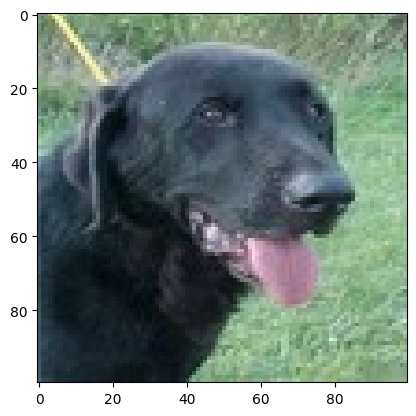

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
given pic is dog


In [ ]:


while True:
    filename = input("Enter image file name (with extension): ")
    if os.path.isfile(filename):
        break
    else:
        print("File not found. Please try again.")
img = cv2.imread(filename)
img = cv2.resize(img, (100, 100))
img = img / 255.0  # Normalize pixel values
img = img.reshape(1, 100, 100, 3)
y_pred = model.predict(img)
y_pred = y_pred > 0.5

pred = 'dog' if y_pred[0][0] == 0 else 'cat'
print("The given image is predicted as:", pred)